
<div style="text-align: left;">
<table style="width:100%; background-color:transparent;">
  <tr style="background-color:transparent;">
    <td style="background-color:transparent;"><a href="http://www.datascience-paris-saclay.fr">
<img border="0" src="http://project.inria.fr/saclaycds/files/2017/02/logoUPSayPlusCDS_990.png" width="90%"> </td>
<img border="0" src="http://www.auchylesmines.fr/wp-content/uploads/2015/03/Logo-securite-routiere-651x263.jpg" width="60%"> </td>
  </tr>
</table> 
</div>

<center><h1>France accident challenge</h1></center>
<br/>
<center>Nayel Bettache (ENSAE), Axel Marchand (ENSAE), Solène Cochennec (HEC-ENSAE), Rodrigue Rillardon (ENSAE)</center>

Predicting accidents using Open Data Gouv Data: [Open Data Gouv](https://www.data.gouv.fr/fr/)

## Table of Contents

0. [Introduction](#Introduction)
1. [Data](#Data)
3. [Score metric](#Score-metric)
4. [Data exploration](#Data-exploration)
5. [Predictions](#Predictions)
6. [Record linkage](#Record-linkage)
7. [Submission structure](#Submission-structure)
8. [Local testing](#Local-testing-(before-submission))
9. [Submitting to RAMP studio](#Submitting-to-[ramp.studio](http://ramp.studio))
10. [More information](#More-information)

# Introduction

The objective of this challenge is to work with 'massive' and 'raw' data. We have a really high number of datasets, with most of the data either useless or at first not explained or use. Most real data is dirty and the availability of high-quality, open-source ML and data analysis frameworks (such as [scikit-learn](https://scikit-learn.org/),
[pandas](https://pandas.pydata.org/)...) means that the next frontier for tooling and automation lies in preprocessing. This challenge aims to investigate methodologies to perform statistical analysis directly on the original dirty data.

We have at our disposal about 14 years of data about the road accidents in France from 2004 to 2018. We will only use 3 years to avoid using a dataset too huge. 

There are twelve datasets in this challenge, describing the years 2018, 2017, 2016. Each year has 4 differents datasets

* `caracteristiques_{YEAR}.csv` - basic data about the accidents.
* `lieux_{YEAR}.csv` - data about the location of the accidents.
* `usagers_{YEAR}.csv` - data about the people involved in the accidents.
* `vehicules_{YEAR}.csv` - data about the vehicles involved.


# Aim

The predictive aim of this challenge is to use the different datasets to predict the number of accidents for each location in a day. It is advised that you use all datasets, as it improves the prediction (see [Score comparison](#Score-comparison)), but using only the `caracteristiques_{YEAR}.csv` dataset is also allowed.

In [1]:
!python download_data.py

=> File saved as data/vehicules_2018.csv
=> File saved as data/usagers_2018.csv
=> File saved as data/lieux_2018.csv
=> File saved as data/caracteristiques_2018.csv
=> File saved as data/vehicules_2017.csv
=> File saved as data/usagers_2017.csv
=> File saved as data/lieux_2017.csv
=> File saved as data/caracteristiques_2017.csv
=> File saved as data/vehicules_2016.csv
=> File saved as data/usagers_2016.csv
=> File saved as data/lieux_2016.csv
=> File saved as data/caracteristiques_2016.csv


# Data


### Get the data 

In [2]:
import pandas as pd
import os
from data_cleaning import preparation_data 

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
path = "/Users/solene/Desktop/France_accidents/data/" ## Path Solène 

## Concatenation des bases des différents années si concat=True 
df_caracteristiques, df_lieux, df_usagers, df_vehicules = preparation_data(path,concat=True)

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3249: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Inside Preparation_data : 
- Si option concat (préférable) : 4 tables regroupant les années 2016, 2017 et 2019 chacune 
- Suppression des doublon dans la base caracteristiques
- Transformation des variablles an, mois et jour 
- Création des variables Date, heure et jour_semaine 


## Caracteristiques



$\textbf{List of features}:\\ $   
- Num_Acc : Accident number 
- An : année 
- Mois : Mois
- Jour : Jour 
- hrmn : heure et minutes
- lum : qualité de l'éclairage 
- agg : localisation ( 1: hors agglomération, 2: agglomération) 
- int : intersection 
- atm : conditions atmosphériques
- col : type de collision 
- com : commune (numéro donné par l'INSEE)  
- adr : adresse 
- gps : M (Métropoles), A (Antilles), G (Guyane), R (Réunion), Y (Mayotte)
- lat : latitude 
- long : longitude 
- dep : départmenet (code INSEE)

Beaucoup de duplicate, suppprimés dans preparation_data

In [5]:
df_caracteristiques.head(15)

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,com,adr,gps,lat,long,dep,Date,jour_semaine,heure
0,201800000001,2018,01,24,1505,1,1,4,1.0,1.0,5,route des Ansereuilles,M,5055737.0,294992.0,590,2018-01-24 15:05:00,2,15
1,201800000002,2018,02,12,1015,1,2,7,7.0,7.0,11,Place du général de Gaul,M,5052936.0,293151.0,590,2018-02-12 10:15:00,0,10
2,201800000003,2018,03,04,1135,1,2,3,1.0,7.0,477,Rue nationale,M,5051243.0,291714.0,590,2018-03-04 11:35:00,6,11
3,201800000004,2018,05,05,1735,1,2,1,7.0,3.0,52,30 rue Jules Guesde,M,5051974.0,289123.0,590,2018-05-05 17:35:00,5,17
4,201800000005,2018,06,26,1605,1,2,1,1.0,3.0,477,72 rue Victor Hugo,M,5051607.0,290605.0,590,2018-06-26 16:05:00,1,16
5,201800000006,2018,09,23,0630,2,2,1,2.0,6.0,52,D39,M,5052132.0,288837.0,590,2018-09-23 06:30:00,6,6
6,201800000007,2018,09,26,0040,5,2,1,1.0,6.0,133,4 route de camphin,M,5052211.0,296652.0,590,2018-09-26 00:40:00,2,0
7,201800000008,2018,11,30,1715,5,2,1,1.0,6.0,11,rue saint exupéry,M,5053146.0,293875.0,590,2018-11-30 17:15:00,4,17
8,201800000009,2018,02,18,1557,1,1,1,1.0,6.0,550,rue de l'égalité,M,5053707.0,284896.0,590,2018-02-18 15:57:00,6,15
9,201800000010,2018,03,19,1530,1,2,2,1.0,1.0,51,face au 59 rue de Lille,M,5053639.0,281517.0,590,2018-03-19 15:30:00,0,15


In [6]:
df_caracteristiques.shape

(118484, 19)

In [7]:
df_caracteristiques.dtypes

Num_Acc                  int64
an                      object
mois                    object
jour                    object
hrmn                    object
lum                      int64
agg                      int64
int                      int64
atm                    float64
col                    float64
com                      int64
adr                     object
gps                     object
lat                    float64
long                   float64
dep                      int64
Date            datetime64[ns]
jour_semaine             int64
heure                    int64
dtype: object

In [8]:
df_caracteristiques.isna().sum()

Num_Acc            0
an                 0
mois               0
jour               0
hrmn               0
lum                0
agg                0
int                0
atm               18
col                8
com                0
adr             1377
gps             4658
lat             9554
long            9554
dep                0
Date               0
jour_semaine       0
heure              0
dtype: int64

In [9]:
df_caracteristiques.nunique()

Num_Acc         118484
an                   2
mois                12
jour                31
hrmn              1419
lum                  5
agg                  2
int                 10
atm                  9
col                  7
com                853
adr              76499
gps                  5
lat              83821
long             89925
dep                101
Date             85690
jour_semaine         7
heure               24
dtype: int64

### Accidents en fonction des données temporelles

Somme des accidents en fonction du mois 

In [10]:
df_caracteristiques.mois.value_counts().sort_index()

01     8939
02     7546
03     9252
04     9945
05    10321
06    11514
07    10574
08     8789
09    10784
10    11222
11    10066
12     9532
Name: mois, dtype: int64

Somme des accidents en fonction du jour de la semaine (0:lundi ...) 

In [11]:
df_caracteristiques.jour_semaine.value_counts().sort_index()

0    15966
1    17254
2    16952
3    17522
4    19856
5    16641
6    14293
Name: jour_semaine, dtype: int64

Somme des accidents en fonction de l'heure

In [12]:
df_caracteristiques.heure.value_counts().sort_index()

0      2096
1      1750
2      1368
3      1245
4      1235
5      1803
6      2534
7      5220
8      6978
9      6018
10     5407
11     6016
12     6292
13     5843
14     6444
15     7219
16     8498
17    10297
18     9833
19     7660
20     5322
21     3828
22     3010
23     2568
Name: heure, dtype: int64

In [13]:
table = df_caracteristiques.pivot_table('Num_Acc', 'heure', 'jour_semaine', aggfunc="count")
table

jour_semaine,0,1,2,3,4,5,6
heure,,,,,,,
0,204,194,210,240,301,473,474
1,156,139,160,180,231,417,467
2,110,86,102,133,197,331,409
3,93,98,92,134,153,315,360
4,95,91,109,112,178,305,345
5,186,154,165,185,206,424,483
6,326,315,307,333,374,371,508
7,900,928,902,882,844,331,433
8,1146,1345,1167,1319,1247,395,359


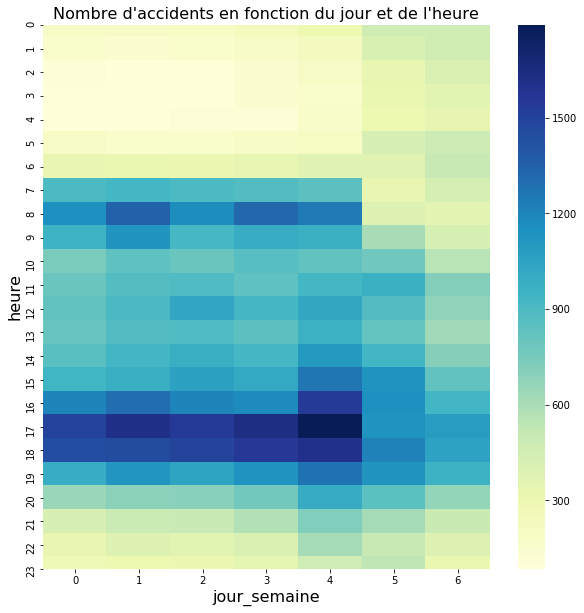

In [14]:
plt.figure(figsize=(10, 10))
plt.title('Nombre d\'accidents en fonction du jour et de l\'heure', fontsize=16)
plt.xlabel('', fontsize=16)
plt.ylabel('', fontsize=16)

heatmap = sns.heatmap(table, cmap="YlGnBu")

## Lieux



$\textbf{List of features}: \\ $ 
- Num_Acc : numéro accident 
- catr: Catégorie de route 
- voie : numéro de route 
- V1 : indice numérique du numéro de route (2 bis etc.) 
- V2 : lettre indice alphanumérique de la route 
- circ: régime de circulation (sens unique...) 
- nbv: nombre total de voies de circulation  
- vosp : signal l'existence de voie réservée (pidte cyclable...) 
- prof : pente de la route (1: plat..) 
- pr : numéro du PR de rattrachement (borne amont) 
- pr1 : distance en mètres au PR 
- plan : tracé en plan (courbe ou ligne droite...) 
- lartpc : largeur du terre plein central si existant 
- larrout : largueur de la chaussée affectée à la circulation des véhicules 
- surf : état de la surface (normale, mouillée...) 
- infra : infrastructure (pont, tunnel) 
- situ : situation de l'accident (chaussée, trottoir...) 
- env1 : indicatrice proximité d'une école 

In [9]:
df_lieux.head(5)

,Num_Acc,catr,voie,v1,v2,circ,nbv,pr,pr1,vosp,prof,plan,lartpc,larrout,surf,infra,situ,env1
0,201800000001,3,41,NaN,C,2.0,2.0,NaN,NaN,0.0,1.0,3.0,NaN,NaN,1.0,0.0,1.0,0.0
1,201800000002,4,41,NaN,D,2.0,2.0,NaN,NaN,0.0,1.0,2.0,NaN,NaN,1.0,0.0,1.0,0.0
2,201800000003,3,39,NaN,D,2.0,2.0,NaN,NaN,0.0,1.0,1.0,NaN,NaN,1.0,0.0,1.0,0.0
3,201800000004,3,39,NaN,NaN,2.0,2.0,NaN,NaN,0.0,1.0,1.0,NaN,NaN,1.0,0.0,1.0,0.0
4,201800000005,4,NaN,NaN,NaN,1.0,1.0,NaN,NaN,0.0,1.0,1.0,NaN,NaN,1.0,0.0,1.0,0.0


In [10]:
df_lieux.shape 

(177916, 18)

In [11]:
df_lieux.nunique()

Num_Acc    177916
catr            8
voie         1861
v1              2
v2             52
circ            5
nbv            14
pr            569
pr1          1492
vosp            4
prof            5
plan            5
lartpc        263
larrout       418
surf           10
infra           8
situ            6
env1            3
dtype: int64

## Usagers



$\textbf{List of features}: \\ $ 
- Num_Acc : numéro accident, NON unique, puisque même numéro pour chaque usager de l'accident 
- place: place dans le véhicule au moment de l'accident (1: conducteur) 
- catu : catégorie d'usager (conducteur, passager, piéton ...) 
- grav : gravité de l'accident (1: indemne, 2: Tué, 3: Blessé hospitalisé et 4: Blessé léger) 
- sexe : 1 (Masculin), 2 (Féminin) 
- trajet : motif du déplacement (domicile-travail etc )  
- sécu : équipement de sécurité et unitilisation de l'équipement (11 = 1: ceinture + 1: Oui )
- locp: localisation du piéton 
- actp : action du piéton 
- étatp : piéton seul ou non 
- an_nais : année de naissance de l'usager
- num_veh : identifiant du véhicule 

In [12]:
df_usagers.head(15)

,Num_Acc,place,catu,grav,sexe,trajet,secu,locp,actp,etatp,an_nais,num_veh
0,201800000001,1.0,1,3,1,0.0,11.0,0.0,0.0,0.0,1928.0,B01
1,201800000001,1.0,1,1,1,5.0,11.0,0.0,0.0,0.0,1960.0,A01
2,201800000002,1.0,1,1,1,0.0,11.0,0.0,0.0,0.0,1947.0,A01
3,201800000002,NaN,3,4,1,0.0,2.0,2.0,3.0,1.0,1959.0,A01
4,201800000003,1.0,1,3,1,5.0,21.0,0.0,0.0,0.0,1987.0,A01
5,201800000003,1.0,1,1,1,0.0,3.0,0.0,0.0,0.0,1977.0,C01
6,201800000004,1.0,1,3,1,5.0,2.0,0.0,0.0,0.0,2013.0,B01
7,201800000004,1.0,1,1,1,5.0,11.0,0.0,0.0,0.0,1982.0,A01
8,201800000005,1.0,1,4,1,5.0,21.0,0.0,0.0,0.0,2001.0,A01
9,201800000005,1.0,1,1,1,5.0,11.0,0.0,0.0,0.0,1946.0,B01


In [13]:
df_usagers.shape

(399612, 12)

In [14]:
df_usagers.nunique()

Num_Acc    177916
place           9
catu            4
grav            4
sexe            2
trajet          7
secu           18
locp            9
actp            8
etatp           4
an_nais       106
num_veh        86
dtype: int64

## Vehicles


$\textbf{List of features}: \\ $ 
- Num_Acc : numéro accident, NON unique, puisque même numéro pour chaque véhicule de l'accident 
- senc : sens de circulation 
- catv : catégorie du véhicule 
- occutc : nombre d'occupants dans le transport en commun 
- obs : obstacle fixe heurté (type) 
- obsm : obstacle mobile heurté 
- choc : point de choc initiale (1: avant, 2: avant droit...) 
- manv : manoeuvre principale avant l'accident (1: sans chgt de direction, 4: en marche arrière...) 
- num_veh : identifiant du véhicule (repris dans la base usager)

In [17]:
df_vehicules.head(15)

,Num_Acc,senc,catv,occutc,obs,obsm,choc,manv,num_veh
0,201800000001,0.0,7,0,0.0,2.0,3.0,1.0,B01
1,201800000001,0.0,7,0,0.0,2.0,2.0,15.0,A01
2,201800000002,0.0,7,0,0.0,1.0,0.0,1.0,A01
3,201800000003,0.0,33,0,1.0,2.0,1.0,1.0,A01
4,201800000003,0.0,7,0,0.0,2.0,8.0,15.0,B01
5,201800000003,0.0,7,0,0.0,0.0,7.0,24.0,C01
6,201800000004,0.0,1,0,0.0,2.0,8.0,0.0,B01
7,201800000004,0.0,7,0,0.0,9.0,2.0,21.0,A01
8,201800000005,0.0,2,0,0.0,2.0,2.0,17.0,A01
9,201800000005,0.0,7,0,0.0,2.0,3.0,20.0,B01


In [20]:
df_vehicules.nunique()

Num_Acc    177916
senc            3
catv           24
occutc         92
obs            17
obsm            7
choc           10
manv           25
num_veh        87
dtype: int64

In [22]:
df_vehicules.isna().sum()

Num_Acc      0
senc       272
catv         0
occutc       0
obs        282
obsm       227
choc       179
manv       169
num_veh      0
dtype: int64


## Training and test

# Merge the databases 

In [54]:
df_merge = pd.merge(df_caracteristiques, df_lieux, left_on="Num_Acc", right_on="Num_Acc")  
df_merge

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,...,pr1,vosp,prof,plan,lartpc,larrout,surf,infra,situ,env1
0,201800000001,18,1,24,1505,1,1,4,1.0,1.0,...,NaN,0.0,1.0,3.0,NaN,NaN,1.0,0.0,1.0,0.0
1,201800000002,18,2,12,1015,1,2,7,7.0,7.0,...,NaN,0.0,1.0,2.0,NaN,NaN,1.0,0.0,1.0,0.0
2,201800000003,18,3,4,1135,1,2,3,1.0,7.0,...,NaN,0.0,1.0,1.0,NaN,NaN,1.0,0.0,1.0,0.0
3,201800000004,18,5,5,1735,1,2,1,7.0,3.0,...,NaN,0.0,1.0,1.0,NaN,NaN,1.0,0.0,1.0,0.0
4,201800000005,18,6,26,1605,1,2,1,1.0,3.0,...,NaN,0.0,1.0,1.0,NaN,NaN,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118479,201700060697,17,11,19,1030,1,2,1,1.0,6.0,...,936.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,99.0
118480,201700060698,17,11,25,624,1,1,6,1.0,7.0,...,NaN,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
118481,201700060699,17,11,26,1745,2,2,1,1.0,3.0,...,820.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,99.0
118482,201700060700,17,11,28,1405,1,2,1,1.0,3.0,...,890.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,99.0


# Score metric

# Data exploration

## Caracteristiques

## Lieux

## Usagers

TEST